# DataCamp Certification Case Study

### Project Brief

You are on the data science team for a coffee company that is looking to expand their business into Ukraine. They want to get an understanding of the existing coffee shop market there.

You have a dataset from Google businesses. It contains information about coffee shops in Ukraine. The marketing manager wants to identify the key coffee shop segments. They will use this to construct their marketing plan. In their current location, they split the market into 5 segments. The marketing manager wants to know how many segments are in this new market, and their key features.

You will be presenting your findings to the Marketing Manager, who has no data science background.

# Questions
1. What types of coffee shops are currently in Ukraine? What kind of services they propose?
2. Which of them are the most promising? 
3. Where they are located?

### Step 1. Data Cleaning

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data/coffee_shops.csv")

In [3]:
data.head(5)

,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option
0,Mariupol,Dim Kavu,Coffee store,4.6,206.0,NaN,NaN,NaN,NaN
1,Mariupol,Коферум,Cafe,5.0,24.0,$$,False,NaN,True
2,Mariupol,Кофейня Світ Чаю,Coffee shop,5.0,11.0,NaN,NaN,NaN,True
3,Mariupol,Кофейня Starcoff,Coffee shop,4.4,331.0,$$,False,True,True
4,Mariupol,"Кофейня ""Friend Zone""",Coffee shop,5.0,12.0,NaN,NaN,True,True


In [4]:
#check the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           200 non-null    object 
 1   Place name       200 non-null    object 
 2   Place type       200 non-null    object 
 3   Rating           198 non-null    float64
 4   Reviews          198 non-null    float64
 5   Price            122 non-null    object 
 6   Delivery option  129 non-null    object 
 7   Dine in option   140 non-null    object 
 8   Takeout option   144 non-null    object 
dtypes: float64(2), object(7)
memory usage: 14.2+ KB


In [5]:
data.Region.value_counts()
#regions are split equally

Odessa         20
Zaporozhye     20
Dnipro         20
Lviv           20
Mariupol       20
Kherson        20
Poltava        20
Kharkiv        20
Kiev           20
Khrivoy Rog    20
Name: Region, dtype: int64

In [6]:
data['Place type'].value_counts()

Coffee shop                 97
Cafe                        58
Espresso bar                20
Coffee store                11
Store                        3
Coffee roasters              2
Pastry shop                  2
Chocolate shop               1
E-commerce service           1
Internet shop                1
Coffee stand                 1
Appliance repair service     1
Restaurant                   1
European restaurant          1
Name: Place type, dtype: int64

In [7]:
data['Delivery option'].value_counts()

False    94
True     35
Name: Delivery option, dtype: int64

In [8]:
data.Price.value_counts()
#needs change to "human" language -> cheap, average, expensive #idea denied

$$     116
$$$      4
$        2
Name: Price, dtype: int64

In [9]:
#check if dataset contains any missing values
data.isna().sum()

Region              0
Place name          0
Place type          0
Rating              2
Reviews             2
Price              78
Delivery option    71
Dine in option     60
Takeout option     56
dtype: int64

In [10]:
data.Rating.value_counts()

4.6    47
4.7    39
4.9    25
4.5    22
5.0    21
4.8    18
4.4    12
4.3     6
4.2     2
3.9     2
4.0     2
4.1     2
Name: Rating, dtype: int64

In [11]:
data.Rating.describe()

count    198.000000
mean       4.663636
std        0.221648
min        3.900000
25%        4.600000
50%        4.700000
75%        4.800000
max        5.000000
Name: Rating, dtype: float64

In [12]:
data.Reviews.describe()

count      198.000000
mean       622.494949
std       1400.898666
min          3.000000
25%         47.500000
50%        271.500000
75%        786.250000
max      17937.000000
Name: Reviews, dtype: float64

In [13]:
#impute missing values by average values for Raitings and Reviews
data['Rating'] = data['Rating'].fillna(data['Rating'].mean())
data['Reviews'] = data['Reviews'].fillna(data['Reviews'].mean())
data.isna().sum()

Region              0
Place name          0
Place type          0
Rating              0
Reviews             0
Price              78
Delivery option    71
Dine in option     60
Takeout option     56
dtype: int64

Drop 'Price' column because has 39% missing values and after imputation (by most frequent, average, median etc) it will hold small amount of info anyway (97% will be "$$")

In [14]:
data = data.drop('Price', axis=1)

In [15]:
data.isna().sum()

Region              0
Place name          0
Place type          0
Rating              0
Reviews             0
Delivery option    71
Dine in option     60
Takeout option     56
dtype: int64

In [16]:
#inspection of services for missing values
data[['Delivery option', 'Dine in option', 'Takeout option']].apply(pd.Series.value_counts)

,Delivery option,Dine in option,Takeout option
False,94,NaN,NaN
True,35,140.0,144.0


Dine in option and Takeout option are simple to impute - if we have only True values, it means that missing value is True; Delivery option is tricky (False and True values are present in dataset) 

In [17]:
data['Dine in option'] = data['Dine in option'].fillna('False')
data['Takeout option'] = data['Takeout option'].fillna('False')
data['Delivery option'] = data['Delivery option'].fillna('Unknown')
print(data.isna().sum())

Region             0
Place name         0
Place type         0
Rating             0
Reviews            0
Delivery option    0
Dine in option     0
Takeout option     0
dtype: int64


In [18]:
#check if places name are unique; before that make lower all place names and types
data['Place name'] = data['Place name'].str.lower()
data['Place type'] = data['Place type'].str.lower()
data[data['Place name'].duplicated(keep=False)]

,Region,Place name,Place type,Rating,Reviews,Delivery option,Dine in option,Takeout option
23,Poltava,coffee house,cafe,4.7,329.0,False,False,True
45,Kherson,coffee house,coffee shop,4.7,279.0,False,True,True
47,Kherson,coffeeok,coffee shop,4.9,18.0,False,False,True
54,Kherson,coffee house,coffee shop,4.4,67.0,False,False,True
66,Zaporozhye,dim kavy,espresso bar,4.8,118.0,Unknown,False,False
68,Zaporozhye,coffee house,store,4.7,132.0,Unknown,False,False
71,Zaporozhye,my coffee,coffee shop,4.5,341.0,False,True,True
75,Zaporozhye,svit kavy,coffee shop,4.6,488.0,False,True,True
97,Odessa,my coffee,coffee shop,4.8,150.0,False,True,True
100,Lviv,lviv coffee manufacture,coffee shop,4.7,17937.0,True,True,True


In [19]:
data[data[['Place name', 'Region', 'Place type']].duplicated(keep=False)]

,Region,Place name,Place type,Rating,Reviews,Delivery option,Dine in option,Takeout option
45,Kherson,coffee house,coffee shop,4.7,279.0,False,True,True
54,Kherson,coffee house,coffee shop,4.4,67.0,False,False,True
100,Lviv,lviv coffee manufacture,coffee shop,4.7,17937.0,True,True,True
101,Lviv,svit kavy,coffee shop,4.6,2931.0,Unknown,True,True
107,Lviv,svit kavy,coffee shop,4.3,102.0,Unknown,True,True
108,Lviv,lviv coffee manufacture,coffee shop,4.5,778.0,False,True,True
120,Khrivoy Rog,sv кафе,cafe,4.5,998.0,True,True,True
132,Khrivoy Rog,sv кафе,cafe,4.6,740.0,False,True,True
162,Kharkiv,sweeter,coffee shop,4.6,642.0,False,True,True
173,Kharkiv,sweeter,coffee shop,4.6,289.0,False,True,True


Many places are probably franchise coffee shops (due to the same place name). There is no any reasons to drop (or combine) rows which have the same Region, Place name and type and service options (row 163, 173 and row 101, 107) - they may be different shops with the same service offer. This needs further investigation. 

### Step 2. Exploratory Data Analysis (EDA)

<AxesSubplot:xlabel='count', ylabel='Place type'>

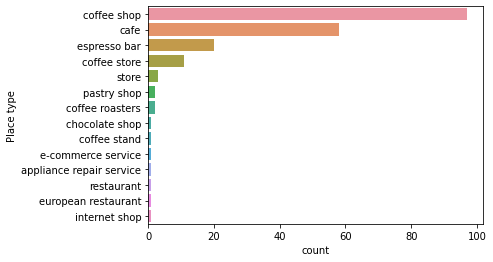

In [20]:
#analysis of categorical columns
sns.countplot(data=data, y='Place type', order=data['Place type'].value_counts().index)

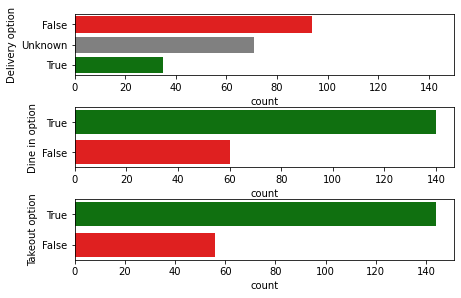

In [24]:
fig, ax = plt.subplots(3, 1)
plt.tight_layout()
sns.countplot(data=data, y='Delivery option', order=data['Delivery option'].value_counts().index, palette=["red", "grey", "green"], ax=ax[0])
sns.countplot(data=data, y='Dine in option', order=data['Dine in option'].value_counts().index, palette=["green", "red"], ax=ax[1])
sns.countplot(data=data, y='Takeout option', order=data['Takeout option'].value_counts().index, palette=["green", "red"], ax=ax[2])
ax[0].set_xlim(0,150);

Text(0.5, 1.0, 'Rating')

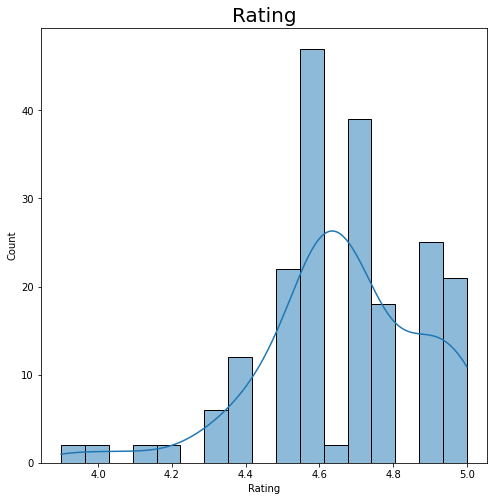

In [26]:
#analysis of numerical columns
plt.figure(figsize=(8,8))
sns.histplot(data['Rating'], kde=True)
plt.title('Rating', fontsize=20);

Text(0.5, 1.0, 'Reviews')

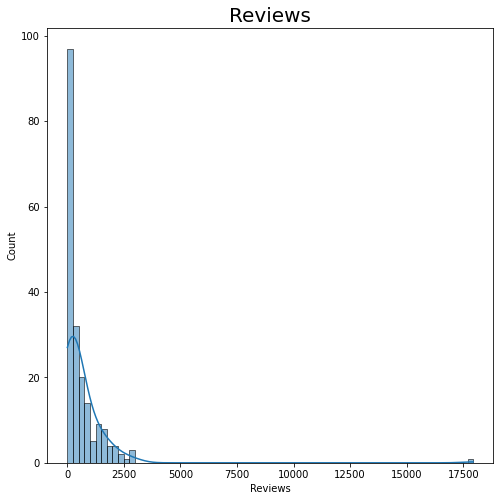

In [27]:
plt.figure(figsize=(8,8))
sns.histplot(data['Reviews'], kde=True)
plt.title('Reviews', fontsize=20);

Reviews plot is right skewed (min reviews are 3, max around 18k) - it means outliers, which needs more investigation. 

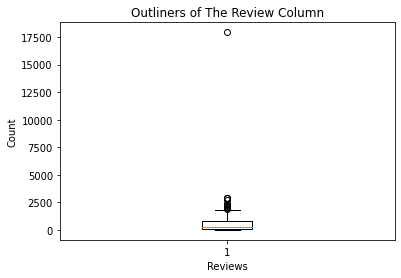

In [28]:
plt.boxplot(data['Reviews'])
plt.xlabel('Reviews')
plt.ylabel('Count')
plt.title('Outliners of The Review Column')
plt.show()

Only one place has extraordinary numer of review, let's find it according to rule three standard deviations.

In [29]:
review_top = data['Reviews'].std()+data['Reviews'].std()*3
data[data['Reviews'] > review_top]

,Region,Place name,Place type,Rating,Reviews,Delivery option,Dine in option,Takeout option
100,Lviv,lviv coffee manufacture,coffee shop,4.7,17937.0,True,True,True


This place looks interesting - for the sake of modeling should be dropped but it can be reviewed more in further analysis. 

In [30]:
data.drop(100, axis=0, inplace=True)

In [31]:
data.reset_index(drop=True)

,Region,Place name,Place type,Rating,Reviews,Delivery option,Dine in option,Takeout option
0,Mariupol,dim kavu,coffee store,4.6,206.0,Unknown,False,False
1,Mariupol,коферум,cafe,5.0,24.0,False,False,True
2,Mariupol,кофейня світ чаю,coffee shop,5.0,11.0,Unknown,False,True
3,Mariupol,кофейня starcoff,coffee shop,4.4,331.0,False,True,True
4,Mariupol,"кофейня ""friend zone""",coffee shop,5.0,12.0,Unknown,True,True
...,...,...,...,...,...,...,...,...
194,Dnipro,artist,restaurant,4.6,963.0,Unknown,True,True
195,Dnipro,dream cafe,cafe,4.3,646.0,False,True,True
196,Dnipro,рута кафе пп куліченко к.і.,cafe,4.6,16.0,False,True,True
197,Dnipro,ob'yektna kava,coffee shop,4.7,599.0,Unknown,True,True


In [32]:
data.Reviews.describe()

count     199.000000
mean      535.487386
std       656.426219
min         3.000000
25%        48.000000
50%       275.000000
75%       759.000000
max      2931.000000
Name: Reviews, dtype: float64

Text(0.5, 1.0, 'Reviews')

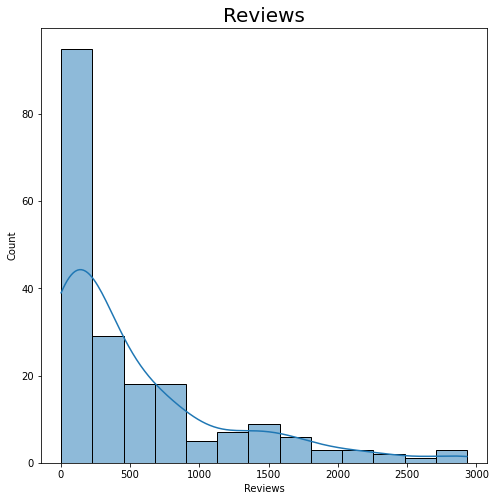

In [33]:
plt.figure(figsize=(8,8))
sns.histplot(data['Reviews'], kde=True)
plt.title('Reviews', fontsize=20);

In [34]:
grouped_region_numcol = data.groupby('Region')['Reviews', 'Rating'].mean()

In [35]:
grouped_region_numcol.sort_values('Rating')

,Reviews,Rating
Region,,
Dnipro,591.574747,4.553182
Kharkiv,544.450000,4.575000
Khrivoy Rog,461.900000,4.600000
Kherson,382.774747,4.643182
Poltava,535.250000,4.655000
Lviv,1096.631579,4.668421
Zaporozhye,389.950000,4.670000
Mariupol,193.800000,4.700000
Kiev,764.600000,4.785000


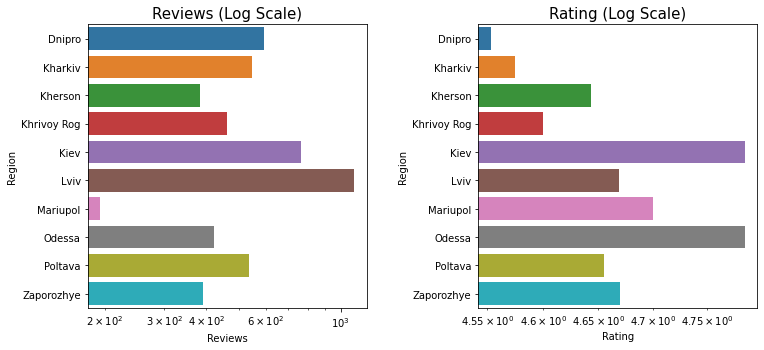

In [37]:
plt.figure(figsize=(12,12))
plt.subplots_adjust(hspace=0.3, wspace=0.4)
for i, col in enumerate(grouped_region_numcol.columns.to_list()):
    plt.subplot(2, 2, i+1)
    sns.barplot(x=grouped_region_numcol[col], y=grouped_region_numcol.index, log=True)
    plt.title(col +' (Log Scale)', fontsize=15)
plt.show()

It is visible that numer of reviews does not correlate with high ratings (as example - look at the Lviv, it has high numer of reviews but rating is medium). Only Kiev has relatively high number of review and high raiting. 

### Step 3. Modeling

For segmentation optimal method is clasterization. First of all, elbow method should be performed to help evaluate appropriate number of clusters for dataset. After it, k-means clustering will be performed.

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [39]:
data_to_cluster = data[['Reviews', 'Rating']]
data_to_cluster

,Reviews,Rating
0,206.0,4.6
1,24.0,5.0
2,11.0,5.0
3,331.0,4.4
4,12.0,5.0
...,...,...
195,963.0,4.6
196,646.0,4.3
197,16.0,4.6
198,599.0,4.7


In [40]:
#data is subjected into standarization to avoid problem with modeling
scaler=StandardScaler()
scaler.fit(data_to_cluster)
data_stand = scaler.transform(data_to_cluster)
data_stand = pd.DataFrame(data=data_stand, columns=data_to_cluster.columns)
data_stand

,Reviews,Rating
0,-0.503207,-0.287750
1,-0.781165,1.526175
2,-0.801019,1.526175
3,-0.312302,-1.194713
4,-0.799492,1.526175
...,...,...
194,0.652915,-0.287750
195,0.168780,-1.648195
196,-0.793383,-0.287750
197,0.096999,0.165731


In [1]:
data_stand.describe().round(2)

NameError: name 'data_stand' is not defined

### Elbow method

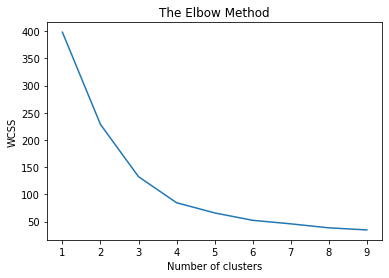

In [42]:
wcss = []

for i in range(1,10):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(data_stand)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Based on the given Elbow plot 3 or 4 cluster can be chosen for further analysis. Nevertheless, today analysis will cover 4 clusters.

### K-Means clustering

In [43]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_stand)
cluster_labels = kmeans.labels_

data = data.assign(cluster=cluster_labels)
data.head()

,Region,Place name,Place type,Rating,Reviews,Delivery option,Dine in option,Takeout option,cluster
0,Mariupol,dim kavu,coffee store,4.6,206.0,Unknown,False,False,3
1,Mariupol,коферум,cafe,5.0,24.0,False,False,True,0
2,Mariupol,кофейня світ чаю,coffee shop,5.0,11.0,Unknown,False,True,0
3,Mariupol,кофейня starcoff,coffee shop,4.4,331.0,False,True,True,1
4,Mariupol,"кофейня ""friend zone""",coffee shop,5.0,12.0,Unknown,True,True,0


In [44]:
#count how many rows have been assigned to each cluster
data['cluster'].value_counts()

3    84
0    58
2    33
1    24
Name: cluster, dtype: int64

In [45]:
data_comp = data[['Rating', 'Reviews', 'cluster']].groupby('cluster').mean()
data_comp

,Rating,Reviews
cluster,,
0,4.913793,74.431034
1,4.262500,416.250000
2,4.603030,1790.515152
3,4.628896,394.857023


In [46]:
#analyse by transforming numbers into proportions
rating_range = data_comp['Rating'].max() - data_comp['Rating'].min()
data_comp['rating_prop'] = (data_comp['Rating'] - data_comp['Rating'].min()) / rating_range
review_range = data_comp['Reviews'].max() - data_comp['Reviews'].min()
data_comp['review_prop'] = (data_comp['Reviews'] - data_comp['Reviews'].min()) / review_range
data_comp

,Rating,Reviews,rating_prop,review_prop
cluster,,,,
0,4.913793,74.431034,1.000000,0.000000
1,4.262500,416.250000,0.000000,0.199185
2,4.603030,1790.515152,0.522853,1.000000
3,4.628896,394.857023,0.562567,0.186719


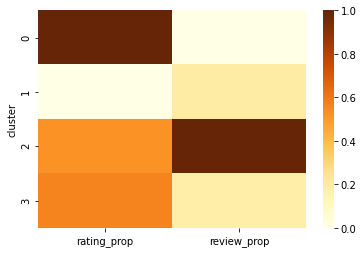

In [47]:
#Heatmap to visualize clusters
sns.heatmap(data_comp[['rating_prop', 'review_prop']], cmap ="YlOrBr")
plt.show()

| Cluster# | Description |
| ----------- | ----------- |
| Cluster 0 | high rating and low reviews |
| Cluster 1 | low raiting and low review |
| Cluster 2 | medium raiting and high reviews |
| Cluster 3 | medium raiting and low reviews |

Cluster 2 which has medium raiting (but the highest) and high reviews are the most promising to analyse. It means that shops covered in this cluster have the best performance from dataset. 

In [48]:
cluster2 = data[data['cluster']==2]

In [49]:
cluster2

,Region,Place name,Place type,Rating,Reviews,Delivery option,Dine in option,Takeout option,cluster
20,Poltava,g coffee,coffee shop,4.5,1596.0,True,True,False,2
21,Poltava,kavun,coffee shop,4.7,1785.0,True,True,False,2
29,Poltava,dzhi,cafe,4.5,1195.0,True,True,True,2
34,Poltava,lviv handmade chocolate,chocolate shop,4.6,1376.0,False,True,True,2
42,Kherson,verona,european restaurant,4.5,1345.0,True,True,False,2
53,Kherson,koko,coffee shop,4.4,1201.0,False,True,True,2
78,Zaporozhye,cholla & joshua,espresso bar,4.6,1482.0,False,True,False,2
79,Zaporozhye,dobra kava,cafe,4.3,1656.0,True,True,False,2
81,Odessa,traveler`s coffee,coffee shop,4.6,2700.0,True,True,True,2
85,Odessa,foundation coffee roasters,espresso bar,4.7,1415.0,True,True,False,2


In [50]:
print('Number of Coffee Places in Cluster 2:', len(cluster2))

Number of Coffee Places in Cluster 2: 33


Text(0.5, 1.0, 'Place type in Cluster 2')

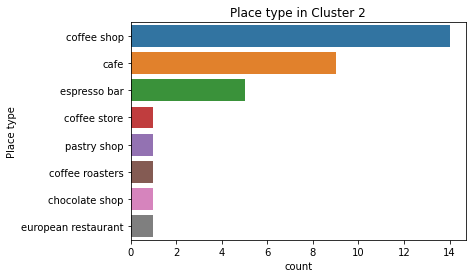

In [51]:
sns.countplot(data=cluster2, y='Place type', order=cluster2['Place type'].value_counts().index)
plt.title("Place type in Cluster 2")

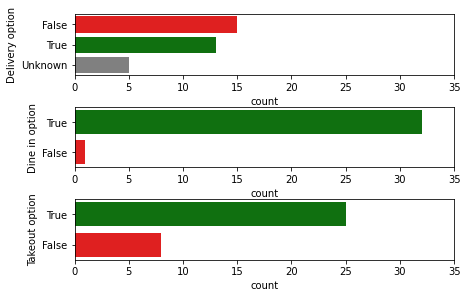

In [52]:
fig, ax = plt.subplots(3, 1)
plt.tight_layout()
sns.countplot(data=cluster2, y='Delivery option', order=cluster2['Delivery option'].value_counts().index, palette=["red", "green", "grey"], ax=ax[0])
sns.countplot(data=cluster2, y='Dine in option', order=cluster2['Dine in option'].value_counts().index, palette=["green", "red"], ax=ax[1])
sns.countplot(data=cluster2, y='Takeout option', order=cluster2['Takeout option'].value_counts().index, palette=["green", "red"], ax=ax[2])
ax[0].set_xlim(0,35)
ax[1].set_xlim(0,35)
ax[2].set_xlim(0,35)
plt.show()

In cluster 2 the most frequent place is a coffee shop and Dine in and Takeout options. Delivery possibility seems to be not that significant, but when we compare results from Cluster 2 to the overall dataset it seems that the delivery option has a positive influence on the performance of places.
Let's see the proportions in clusters for places where all services are possible.

In [53]:
#percentage of the shops providing all services and only Dinein&takeout (dintout) in cluster 2
deliver = cluster2['Delivery option'] == True
dinein = cluster2['Dine in option'] == True
takeout = cluster2['Takeout option'] == True

all_service_2 = cluster2[deliver & dinein & takeout]
dintout_2 = cluster2[deliver & dinein]
prop_2_all = len(all_service_2) / len(cluster2)
prop_2_dt = len(dintout_2) / len(cluster2)
print('Places provide all services in Cluster 2 {:.1%}.'.format(prop_2_all))
print('Places provide Dinein & takeout options in Cluster 2 {:.1%}.'.format(prop_2_dt))

Places provide all services in Cluster 2 21.2%.
Places provide Dinein & takeout options in Cluster 2 36.4%.


In [54]:
#percentage of the shops providing all services and only Dinein&takeout (dintout) in cluster 0
cluster0 = data[data['cluster']==0]
deliver = cluster0['Delivery option'] == True
dinein = cluster0['Dine in option'] == True
takeout = cluster0['Takeout option'] == True

all_service_0 = cluster0[deliver & dinein & takeout]
dintout_0 = cluster0[deliver & dinein]
prop_0_all = len(all_service_0) / len(cluster0)
prop_0_dt = len(dintout_0) / len(cluster0)
print('Places provide all services in Cluster 0 {:.1%}.'.format(prop_0_all))
print('Places provide Dinein & takeout options in Cluster 0 {:.1%}.'.format(prop_0_dt))

Places provide all services in Cluster 0 8.6%.
Places provide Dinein & takeout options in Cluster 0 8.6%.


In [55]:
#percentage of the shops providing all services and only Dinein&takeout (dintout) in cluster 1
cluster1 = data[data['cluster']==1]
deliver = cluster1['Delivery option'] == True
dinein = cluster1['Dine in option'] == True
takeout = cluster1['Takeout option'] == True

all_service_1 = cluster1[deliver & dinein & takeout]
dintout_1 = cluster1[deliver & dinein]
prop_1_all = len(all_service_1) / len(cluster1)
prop_1_dt = len(dintout_1) / len(cluster1)
print('Places provide all services in Cluster 1 {:.1%}.'.format(prop_1_all))
print('Places provide Dinein & takeout options in Cluster 1 {:.1%}.'.format(prop_1_dt))

Places provide all services in Cluster 1 4.2%.
Places provide Dinein & takeout options in Cluster 1 4.2%.


In [56]:
#percentage of the shops providing all services and only Dinein&takeout (dintout) in cluster 3
cluster3 = data[data['cluster']==3]
deliver = cluster3['Delivery option'] == True
dinein = cluster3['Dine in option'] == True
takeout = cluster3['Takeout option'] == True

all_service_3 = cluster3[deliver & dinein & takeout]
dintout_3 = cluster3[deliver & dinein]
prop_3_all = len(all_service_3) / len(cluster3)
prop_3_dt = len(dintout_3) / len(cluster3)
print('Places provide all services in Cluster 3 {:.1%}.'.format(prop_3_all))
print('Places provide Dinein & takeout options in Cluster 3 {:.1%}.'.format(prop_3_dt))

Places provide all services in Cluster 3 10.7%.
Places provide Dinein & takeout options in Cluster 3 11.9%.


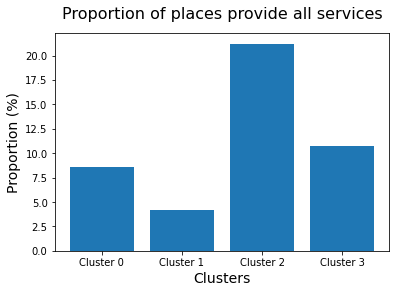

In [57]:
#plot the percentage of the shops providing all services in different clusters
cluster = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']
proportion = [prop_0_all*100, prop_1_all*100, prop_2_all*100, prop_3_all*100]
plt.bar(cluster, proportion)
plt.title('Proportion of places provide all services', size=16, y=1.04)
plt.xlabel('Clusters', size=14)
plt.ylabel('Proportion (%)', size=14)
plt.show()

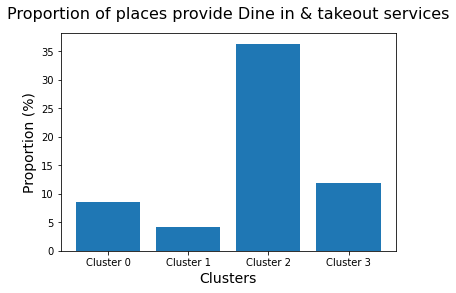

In [58]:
#plot the percentage of the shops providing Dinein&takeout in different clusters
cluster = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']
proportion = [prop_0_dt*100, prop_1_dt*100, prop_2_dt*100, prop_3_dt*100]
plt.bar(cluster, proportion)
plt.title('Proportion of places provide Dine in & takeout services', size=16, y=1.04)
plt.xlabel('Clusters', size=14)
plt.ylabel('Proportion (%)', size=14)
plt.show()

In cluster 2 places provide provide all services are 21.2% but these where only dine in & takeout options are possible is 36.4% which are the highest result within all clusters. This is insight for the Marketing Team to consider implementing all options or at least Dine in & takeout ones.

In [59]:
cluster2.Region.value_counts()

Lviv           8
Kiev           7
Poltava        4
Odessa         3
Dnipro         3
Kharkiv        3
Kherson        2
Zaporozhye     2
Khrivoy Rog    1
Name: Region, dtype: int64

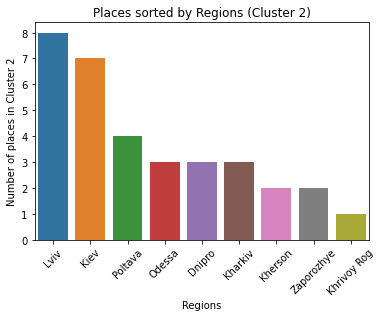

In [60]:
sns.barplot(x=cluster2.Region.value_counts().index, y=cluster2.Region.value_counts())
plt.xticks(rotation=45)
plt.title('Places sorted by Regions (Cluster 2)')
plt.xlabel('Regions')
plt.ylabel('Number of places in Cluster 2')
plt.show()

### Step 4. Conclusion

In general, there are many types of coffee shops in Ukraine. They have different names but they differ from each other by proposing different services: Delivery, Takeout, Dine in.

The analysis consists of data cleaning, EDA and modeling. The selected model was k-means with an optimal number of clusters selected by the elbow method.
Clusters are covering data based on the rating and number of reviews.

1. 4 clusters are optimal numbers for clustering by k-means. It was possible to determine the following segments:
Cluster 0 - high rating and low reviews
Cluster 1 - low rating and low reviews
Cluster 2 - medium rating and high reviews
Cluster 3 - medium rating and low reviews
2. Cluster 2 was selected as the most promising because of the best performance compared to the others. 
Shops that provide all services are 21.2% but these where only dine-in & takeout options are possible is 36.4% which are the highest result within all clusters.
3. Places in cluster 2 are mostly located in Lviv and Kiev.

Future work:
1. Dataset should be extended with more care (avoid missing values). The current dataset consists of many missing values and imputations that could be misleading so recommended is to gather more quality data.
2. Collect data from reviews to make sentiment analysis. It can tell more about customer preferences.
3. Use different modeling methods - for example hierarchical. 
